### 시계열 예측 모델 종류

##### 1. ARIMA ; https://youtu.be/rdR2fNDq6v0?si=kFtaESWAa1pMdzVc / https://youtu.be/P_3808Xv76Q?si=fy6xPV6Z1QE4_u1W
##### 2. SARIMA ; https://youtu.be/8yzVWoivCF4?si=uEZs2hgrVrzPc5Jl
##### 3. Prophet ; https://youtu.be/Sm-YBPUe3qU?si=1lLEkQo-_AsfdXvp
##### 4. LSTM ; https://youtu.be/AYqhQhHtMd0?si=JA8wI6fP9FDF5YLd
##### 5. XGBoost ; https://youtu.be/dwHybuo4u1s?si=uP767CU_1_1pw3xf / https://youtu.be/D5h9KmX6rSI?si=F8bcw57uUSAb6msL

##### 위 영상을 참고하여 각각의 예측 모델 실습을 진행한다.

##### 이해가 안 되거나 해결이 안 되는 문제는 chatGPT 에게 물어본다.

##### 깃허브에 코드를 올려 슈퍼컴으로 실행한다.

# ARIMA 모델

### 모듈 불러오기

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm

### 데이터 불러오기

In [12]:
# minmax 정규화를 사용한 데이터
df_2013 = pd.read_csv("C:/Users/gun67/전력 프로젝트/2013_normalization_data/2013_minmax_data", encoding = "utf-8-sig")
df_2014 = pd.read_csv("C:/Users/gun67/전력 프로젝트/2014_normalization_data/2014_minmax_data", encoding = "utf-8-sig")
df_2015 = pd.read_csv("C:/Users/gun67/전력 프로젝트/2015_normalization_data/2015_minmax_data", encoding = "utf-8-sig")
df_2016 = pd.read_csv("C:/Users/gun67/전력 프로젝트/2016_normalization_data/2016_minmax_data", encoding = "utf-8-sig")

In [13]:
df_all = pd.concat([df_2013, df_2014, df_2015, df_2016], axis = 0)
df = df_all.reset_index(drop = True)
df

,Year-Month-Date,Time,Watt_minmax,Temp('C)_minmax,Humidity(%)_minmax
0,2013-01-01,[ 00:00 ],0.055667,0.378378,0.813486
1,2013-01-01,[ 00:01 ],0.060181,0.378378,0.811090
2,2013-01-01,[ 00:02 ],0.057548,0.378378,0.808709
3,2013-01-01,[ 00:03 ],0.056043,0.378378,0.806313
4,2013-01-01,[ 00:04 ],0.057798,0.378378,0.803917
...,...,...,...,...,...
2102395,2016-12-31,[ 23:55 ],0.036206,0.264706,0.827834
2102396,2016-12-31,[ 23:56 ],0.036669,0.264706,0.824964
2102397,2016-12-31,[ 23:57 ],0.036437,0.264706,0.822095
2102398,2016-12-31,[ 23:58 ],0.032504,0.264706,0.819225


### 데이터 설정

<Axes: >

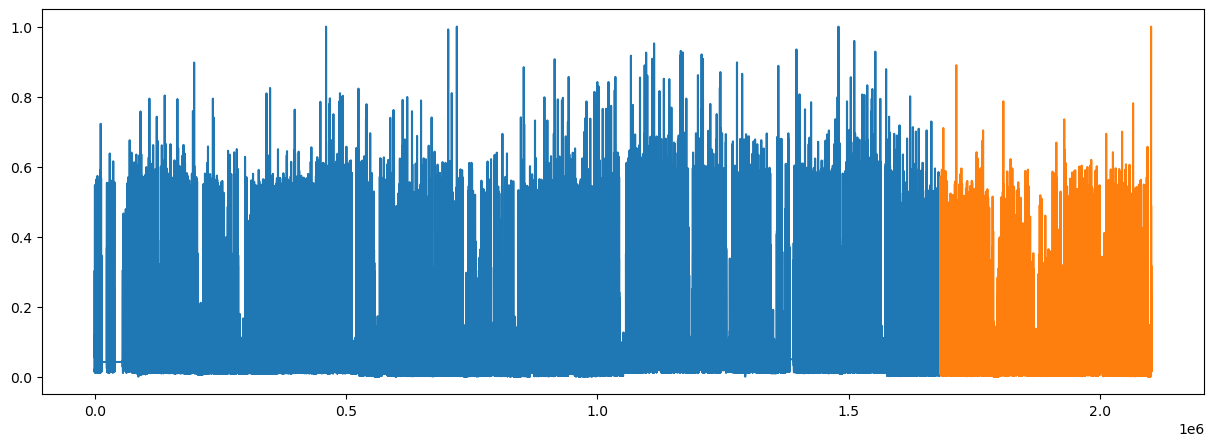

In [15]:
plt.figure(figsize = (15,5))
y_train = df["Watt_minmax"][:int(0.8*len(df))]
y_test = df["Watt_minmax"][int(0.8*len(df)):]
y_train.plot()
y_test.plot()

<Figure size 640x480 with 0 Axes>

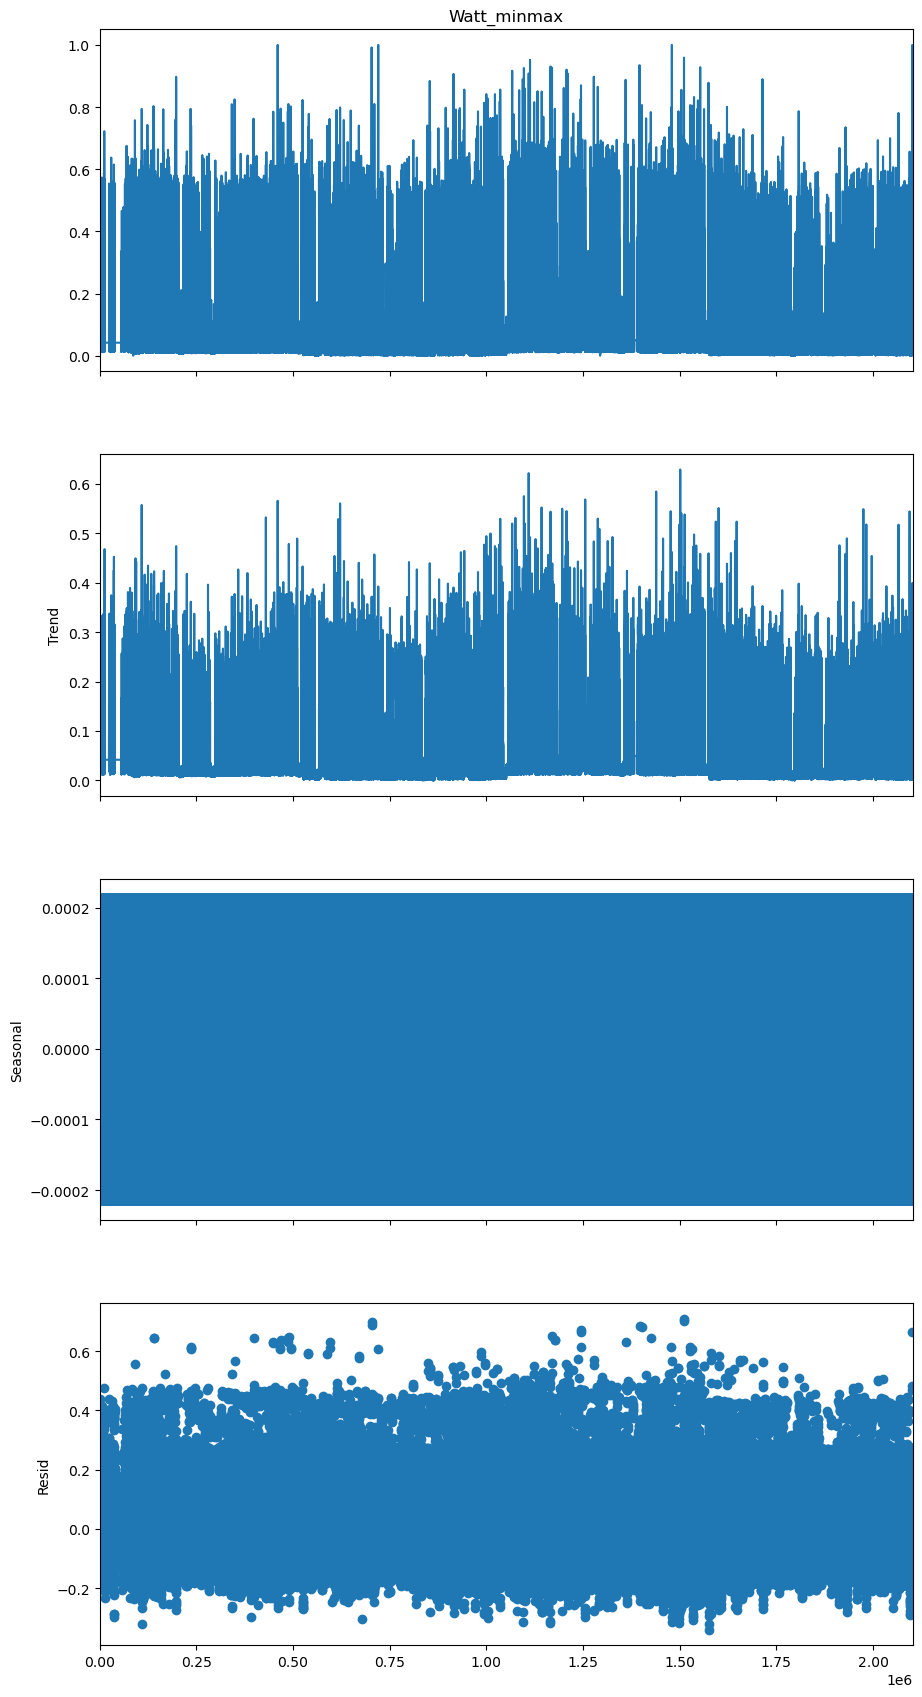

In [27]:
result = seasonal_decompose(df["Watt_minmax"],
                            model = "additive",
                            period = 20)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10,20)

In [ ]:
fig = plt.figure(figsize = (500, 5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["Watt_minmax"], lags = 20, ax = ax1)